In [1]:
import sys
sys.path.insert(0,'../../../ece219-project3')

from project3.utils.DataIO import DataIO
io = DataIO("../data")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Silences warnings from sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
from project3.utils.MovieRatingDataset import MovieRatingsDataset
movie_ratings = MovieRatingsDataset()
data = movie_ratings.table

movieId
356        True
318        True
296        True
593        True
2571       True
          ...  
165959    False
88069     False
4925      False
112512    False
6101      False
Name: count, Length: 9724, dtype: bool


AttributeError: type object 'MovieRatingsDataset' has no attribute 'table'

# Question 1

## A)

In [4]:
sparsity = np.count_nonzero(data) / np.prod(data.shape)
sparsity

0.016999683055613623

## B)

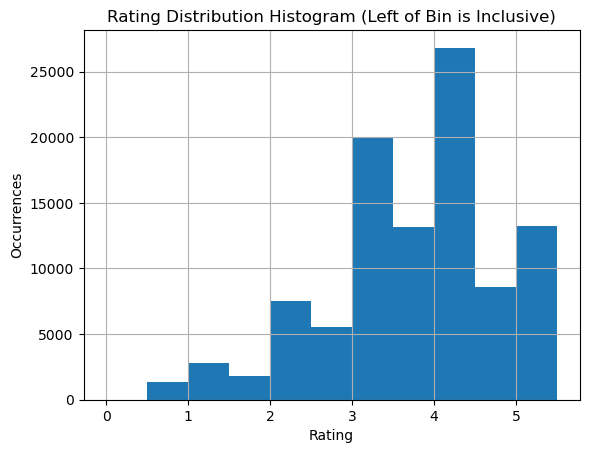

In [5]:
raws['ratings']['rating'].hist(bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
plt.title("Rating Distribution Histogram (Left of Bin is Inclusive)")
plt.xlabel("Rating")
plt.ylabel("Occurrences")
plt.show()

## C)

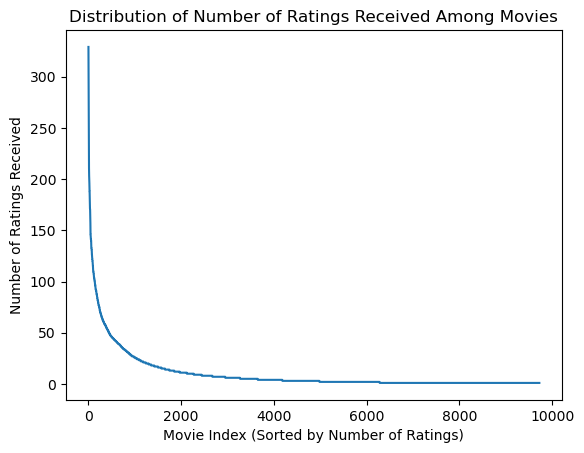

In [6]:
movie_rating_counts = raws['ratings']['movieId'].value_counts().sort_values(ascending=False)
plt.plot(range(len(movie_rating_counts)), movie_rating_counts.values)
plt.title("Distribution of Number of Ratings Received Among Movies")
plt.xlabel("Movie Index (Sorted by Number of Ratings)")
plt.ylabel("Number of Ratings Received")
plt.show()

## D)

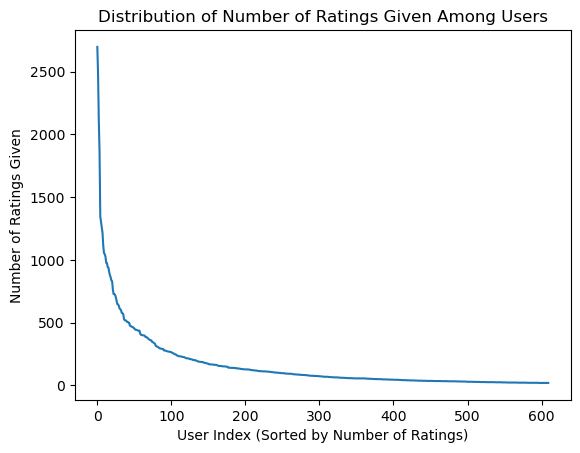

In [7]:
user_rating_counts = raws['ratings']['userId'].value_counts().sort_values(ascending=False)
plt.plot(range(len(user_rating_counts)), user_rating_counts.values)
plt.title("Distribution of Number of Ratings Given Among Users")
plt.xlabel("User Index (Sorted by Number of Ratings)")
plt.ylabel("Number of Ratings Given")
plt.show()

## E) TODO

## F) TODO

# Question 2
## A)
$$
\mu_u = \frac{1}{|I_u|}\sum_{i\in I_u} r_{u,i}
$$

## B)
$I_u \cap I_v$ means the set of item indices that are in both sets, or more simply the items that both users u and v have both rated. $I_u \cap I_v = \emptyset$ implies that there is no intersection between the two sets, so the two users did not rate any of the same items. This is very possible with a large dataset that is as sparse as ours. Take for example one person who only likes action and another who only likes romance, it is unlikely that they have even seen some of the same movies let alone rated them afterwards. 

# Question 3
We mean center the ratings in order to put all of the ratings onto a more consistent scale. Even though users can only rate from 0.5-5, users will interpret the scale differently. For example, a user who is very optimistic might rate most movies a 5, but if they give a movie a 4 that is very unusual for them and that should be taken as a bad rating from that user as opposed to someone who rates everything as a 4 by default. This subtraction of the mean helps us determine which movies a user actually did and did not like compared to their usual ratings. 

# Question 4

In [8]:
from project3.utils.MovieRatingDataset import dataset_from_df
original_dataset = dataset_from_df(raws['ratings'])

In [10]:
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
sim_options = {
    'name': 'pearson'
}
basic_algo = KNNWithMeans(k=2, sim_options=sim_options)
test = cross_validate(algo=basic_algo, data=original_dataset, measures=["RMSE", "MAE"], cv=10, n_jobs=-2, verbose=False)

Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
